<a href="https://colab.research.google.com/github/sanquaorg/Machine-Learning---CSE-305/blob/main/ML_Project_Movie_Genre_Classification(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Dataset and Importing required libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
df=pd.read_csv("https://raw.githubusercontent.com/sanquaorg/ML-Project/main/n_movies.csv")
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


#Converting the values of the genre column into a list

In [ ]:
df2 = df.assign(genre=df.genre.str.split(",")) #Converts all the values of column genre to a list
df2

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"[Action, Comedy, Drama]",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"[Crime, Drama]",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"[Drama, Horror, Mystery]",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"[Animation, Action, Adventure]",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"[Action, Adventure, Drama]",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"[Drama, Horror, Thriller]",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"[Drama, Fantasy, Horror]",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


#Handling Missing values

In [ ]:
df1 = df2.dropna( how='all',
                    subset=['genre'])
df1

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"[Action, Comedy, Drama]",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"[Crime, Drama]",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"[Drama, Horror, Mystery]",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"[Animation, Action, Adventure]",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"[Action, Adventure, Drama]",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"[Drama, Horror, Thriller]",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"[Drama, Fantasy, Horror]",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


#Total Unique genres Used

In [ ]:
total_genre = sum(df1["genre"],[])
len(set(total_genre))

53

#Frequency distribution of Genres

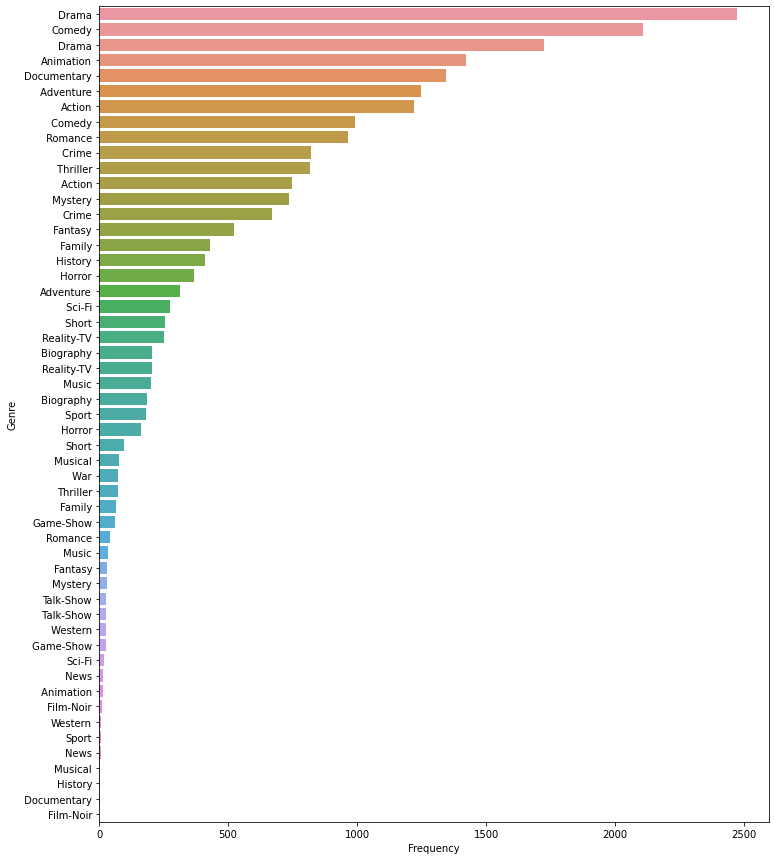

In [ ]:
#Analysis of frequency distribution of each genre used 
freq = nltk.FreqDist(total_genre)
# print(type(freq))
freq_df = pd.DataFrame({"Genre":list(freq.keys()) ,
                       "Frequency":list(freq.values())})
g = freq_df.nlargest(columns="Frequency", n = 53) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Frequency", y = "Genre") 
ax.set(xlabel = 'Frequency') 
ax.set(ylabel = 'Genre') 
plt.show()


#Cleaning the Text - Removal of forward slashes,everything except letters

In [ ]:
def text_clean(text):
  text = re.sub("'\'"," ",text)  #Remove forward slashes
  text = re.sub("[^A-Za-z]"," ",text) #Remove everything except letters
  text=text.lower()
  
  return text
df1["cleaned_plot"] = df1["description"].apply(lambda x:text_clean(x))

df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,year,certificate,duration,genre,rating,description,stars,votes,cleaned_plot
0,Cobra Kai,(2018– ),TV-14,30 min,"[Action, Comedy, Drama]",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",decades after their all valley karate tou...
1,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",follows the political rivalries and romance of...
2,Better Call Saul,(2015–2022),TV-MA,46 min,"[Crime, Drama]",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",the trials and tribulations of criminal lawyer...
3,Devil in Ohio,(2022),TV-MA,356 min,"[Drama, Horror, Mystery]",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",when a psychiatrist shelters a mysterious cult...
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"[Animation, Action, Adventure]",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",a street kid trying to survive in a technology...
...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"[Action, Adventure, Drama]",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",after an experimental gene therapy turns them ...
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"[Drama, Horror, Thriller]",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",sheriff deputy rick grimes wakes up from a com...
9954,The Crown,(2016– ),TV-MA,58 min,"[Biography, Drama, History]",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",follows the political rivalries and romance of...
9955,Supernatural,(2005–2020),TV-14,44 min,"[Drama, Fantasy, Horror]",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",two brothers follow their father s footsteps a...


#Frequency of the words in the corpus

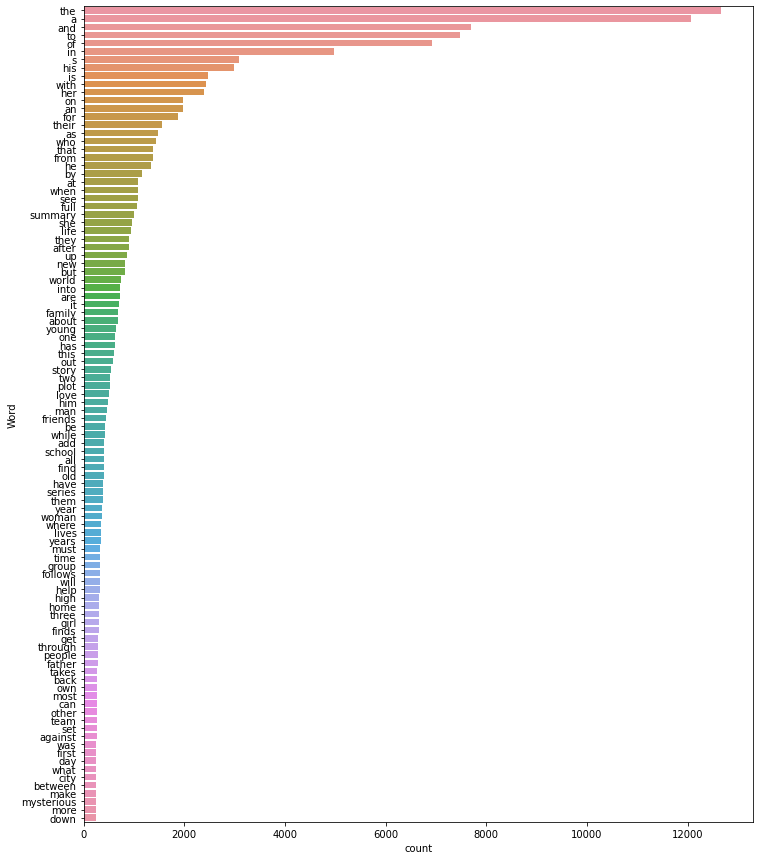

In [ ]:
def freq_words(x,terms):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist=nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
  d=words_df.nlargest(columns="count",n = terms)

  plt.figure(figsize=(12,15))
  ax=sns.barplot(data=d,x="count",y="word")
  ax.set(ylabel='Word')
  plt.show()




freq_words(df1['cleaned_plot'],100)

#Removing the stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


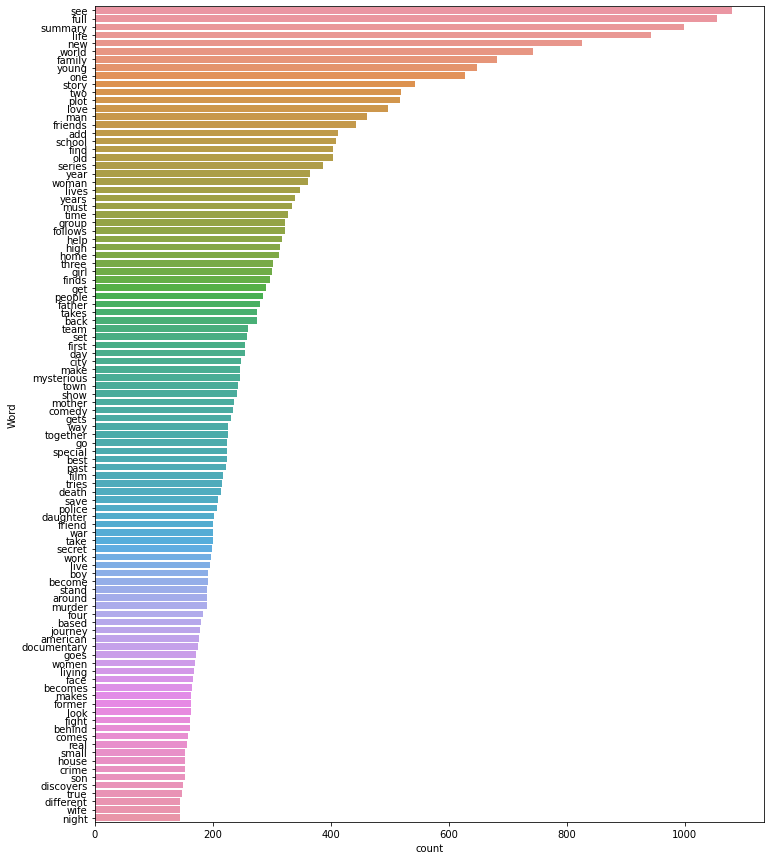

0              [Action,  Comedy,  Drama]
1          [Biography,  Drama,  History]
2                        [Crime,  Drama]
3             [Drama,  Horror,  Mystery]
4       [Animation,  Action,  Adventure]
                      ...               
9952        [Action,  Adventure,  Drama]
9953         [Drama,  Horror,  Thriller]
9954       [Biography,  Drama,  History]
9955          [Drama,  Fantasy,  Horror]
9956          [Drama,  Horror,  Mystery]
Name: genre, Length: 9884, dtype: object


In [ ]:
#Removing the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  no_stpwrd=[w for w in text.split() if not w in stop_words ]
  return ' '.join(no_stpwrd)

df1['cleaned_plot']=df1['cleaned_plot'].apply(lambda x:remove_stopwords(x))

freq_words(df1['cleaned_plot'],100)
print(df1["genre"])


# from nltk.tokenize import word_tokenize
# print(word_tokenize(df1['cleaned_plot']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


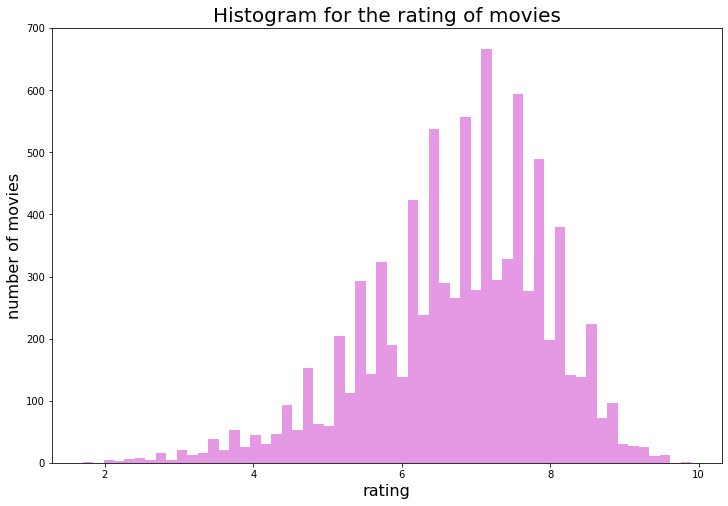

In [ ]:
x = df1['rating']
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'rating', fontsize = 16)
ax.set_ylabel(ylabel = 'number of movies',fontsize = 16)
ax.set_title(label = 'Histogram for the rating of movies', fontsize = 20)
plt.show()

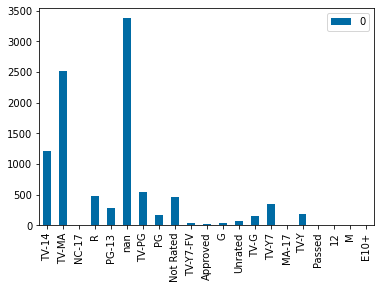

In [ ]:
from collections import Counter
letter_counts = Counter(df1['certificate'])
df2 = pd.DataFrame.from_dict(letter_counts, orient='index')
df2.plot(kind='bar')

#Multilabel Binarizer,Tf-Idf Vectorizer

In [ ]:
#Converting Text To Features
#We treat this Multi-Label classification problem as Binary Relevance Problem. Thus we use ONE HOT ENCODING
# print(df1)
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df1['genre'])
y=multilabel_binarizer.transform(df1['genre']) #Transforms the words to vector


tfidf_vectorizer=TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain,xval,ytrain,yval=train_test_split(df1['cleaned_plot'],y,test_size=0.2,random_state=9)

xtrain_tfidf=tfidf_vectorizer.fit_transform(xtrain) #gives a 2d array

xval_tfidf = tfidf_vectorizer.transform(xval)

#Building Our Movie Genre Preidction
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
lr = LogisticRegression()
clf= OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf,ytrain)

y_pred=clf.predict(xval_tfidf)
pd.set_option("max_colwidth",60)
# y1=pd.DataFrame(y_pred)
# y1
print(y_pred)
print(multilabel_binarizer.inverse_transform(y_pred)[186])


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

recall = recall_score(yval,y_pred,average='micro')
print("Recall Score: ",recall)
result4 = []

result4.append(round(recall,2))
print("-----"*10)

cm =multilabel_confusion_matrix(yval,y_pred)
print(cm)
print(classification_report(yval,y_pred))
# ax=plt.subplot();
# sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
# ax.set_xlabel('Predicted')
# ax.set_ylabel('Actual')
# ax.set_ylim(2.0,0)
# ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(['Neg','Pos'])
# ax.yaxis.set_ticklabels(['Neg','Pos'])
# plt.show()


f1_score(yval,y_pred,average="micro")


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(' Drama', ' Mystery')
Recall Score:  0.07383156468728833
--------------------------------------------------
[[[1845    0]
  [ 121   11]]

 [[1727    3]
  [ 219   28]]

 [[1973    0]
  [   4    0]]

 [[1938    0]
  [  39    0]]

 [[1783    0]
  [ 180   14]]

 [[1815    0]
  [ 158    4]]

 [[1977    0]
  [   0    0]]

 [[1454   19]
  [ 469   35]]

 [[1886    0]
  [  91    0]]

 [[1868    0]
  [ 109    0]]

 [[1971    0]
  [   6    0]]

 [[1971    0]
  [   6    0]]

 [[1906    0]
  [  67    4]]

 [[1906    0]
  [  71    0]]

 [[1933    0]
  [  44    0]]

 [[1956    0]
  [  21    0]]

 [[1824    1]
  [ 149    3]]

 [[1973    0]
  [   4    0]]

 [[1924    0]
  [  43   10]]

 [[1772    4]
  [ 191   10]]

 [[1922    0]
  [  55    0]]

 [[1936    0]
  [  38    3]]

 [[1936    0]
  [  41    0]]

 [[1972    0]
  [   5    0]]

 [[1803    0]
  [ 174    0]]

 [[1958    0]
  [  19

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.13591022443890274

#METHODS USING GAUSSIAN NAIVE BAYES

In [ ]:
 !pip install scikit-multilearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 4.8 MB/s 


#1)Binary Relevance Method

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
binary_rel_clf = BinaryRelevance(GaussianNB())
binary_rel_clf.fit(xtrain_tfidf,ytrain)

br_pred = binary_rel_clf.predict(xval_tfidf)
br_pred.toarray()
from sklearn.metrics import accuracy_score,hamming_loss
accuracy_score(yval,br_pred)

0.08396560445118867

#2)Classifier chains method

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())


classifier.fit(xtrain_tfidf, ytrain)


predictions = classifier.predict(xval_tfidf)

accuracy_score(yval,predictions)



0.09205867475973697

#3)Label Powerset Method

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())



classifier.fit(xtrain_tfidf, ytrain)
predictions = classifier.predict(xval_tfidf)

accuracy_score(yval,predictions)

0.21547799696509864

#Exclusive visualizations using seaborn

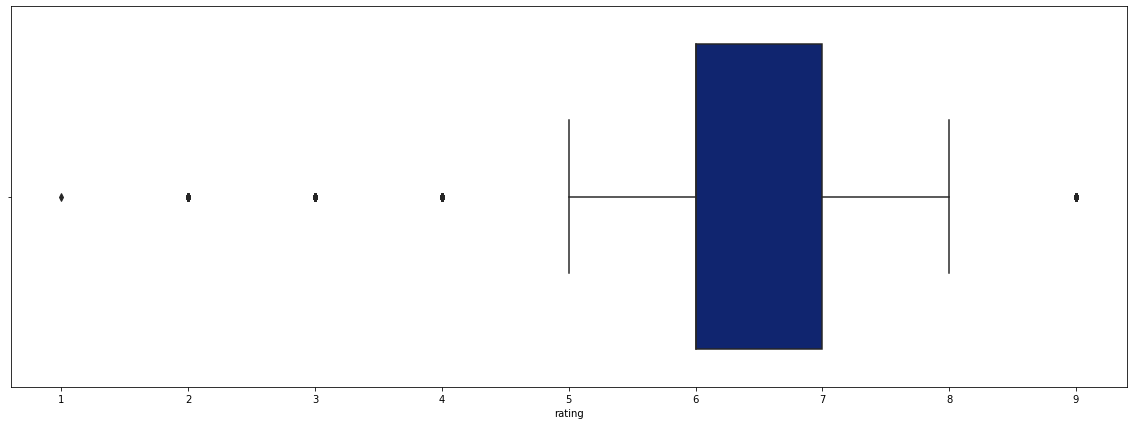

In [ ]:
df=df.dropna()
df.isnull().sum()
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')
sns.boxplot(x=df["rating"].astype('int'))

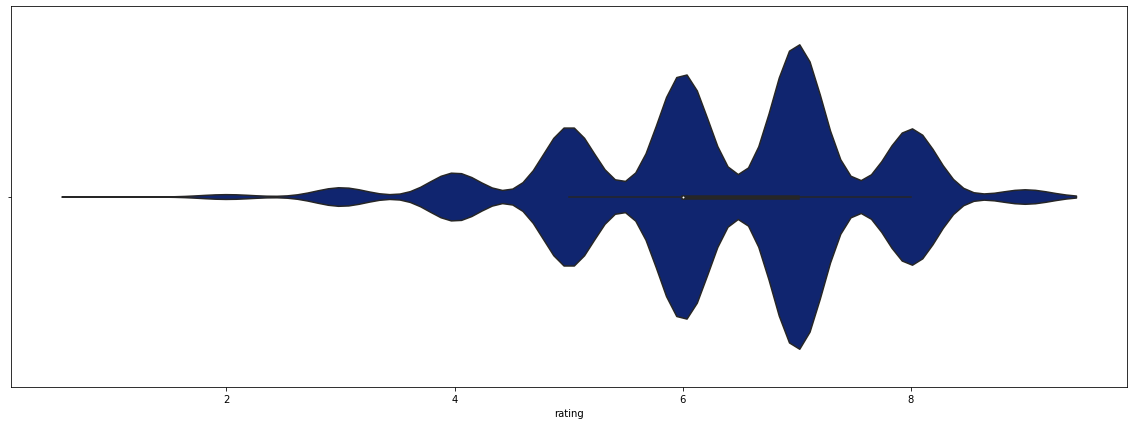

In [ ]:
sns.violinplot(x=df["rating"].astype('int'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


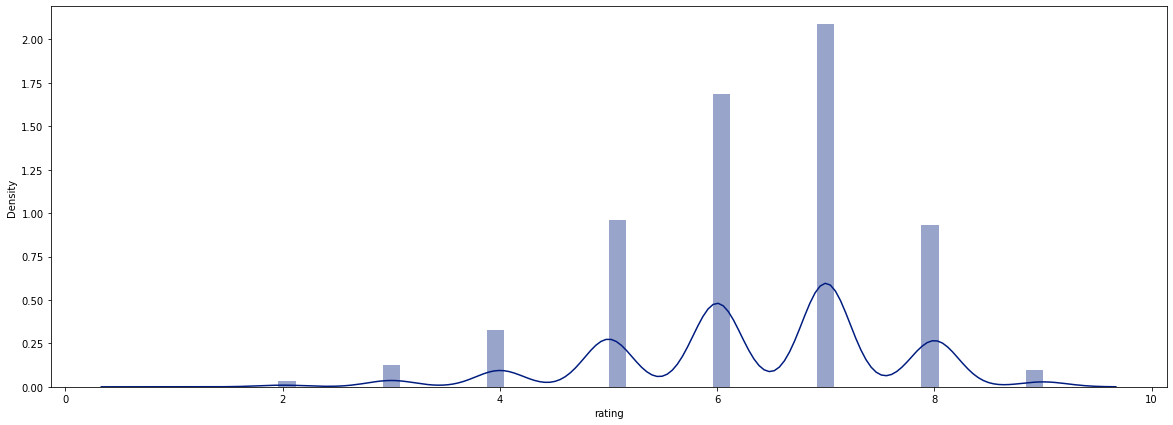

In [ ]:
sns.distplot(df["rating"].astype('int'))